In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(np.uint8)
partition = 60000
X_train, X_test, y_train, y_test = X[:partition], X[partition:], y[:partition], y[partition:]

In [2]:
from sklearn.ensemble import RandomForestClassifier

random_forrest_classifier = RandomForestClassifier(n_jobs=16)
random_forrest_classifier.fit(X_train, y_train)

/home/codejamninja/.pyenv/versions/3.6.9/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=16,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

x = X_test[100]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

random_forrest_classifier.predict([x])

<Figure size 640x480 with 1 Axes>

array([6], dtype=uint8)

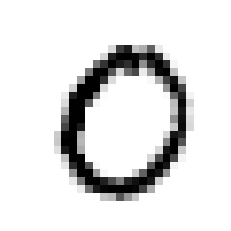

array([0], dtype=uint8)

In [4]:
x = X_test[101]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

random_forrest_classifier.predict([x])

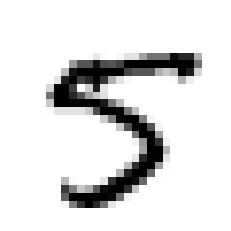

array([5], dtype=uint8)

In [5]:
x = X_test[102]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

random_forrest_classifier.predict([x])

In [6]:
from sklearn.model_selection import cross_val_score

cross_val_score(random_forrest_classifier, X_train, y_train, cv=3, scoring='accuracy')

array([0.93771246, 0.93534677, 0.9393409 ])

In [7]:
from sklearn.model_selection import cross_val_predict

y_hat_train = cross_val_predict(random_forrest_classifier, X_train, y_train, cv=3)
y_hat_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
from sklearn.metrics import precision_score

precision_score(y_train, y_hat_train, average='weighted')

0.9390463224732065

In [9]:
from sklearn.metrics import recall_score

recall_score(y_train, y_hat_train, average='weighted')

0.9390666666666667

In [10]:
from sklearn.metrics import f1_score

f1_score(y_train, y_hat_train, average='weighted')

0.9389337937000979

In [11]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, y_hat_train)
conf_matrix

array([[5787,    5,   20,   12,   10,   19,   22,    5,   39,    4],
       [   3, 6627,   45,   17,   12,    6,    5,   12,   11,    4],
       [  46,   25, 5618,   58,   48,   16,   28,   52,   58,    9],
       [  24,   27,  146, 5604,   10,  126,    7,   51,   99,   37],
       [  14,   18,   41,    6, 5543,    6,   48,   21,   24,  121],
       [  56,   16,   21,  213,   30, 4930,   53,   10,   57,   35],
       [  44,   19,   31,    6,   22,   76, 5703,    0,   16,    1],
       [  11,   30,   90,   32,   71,    0,    2, 5920,   17,   92],
       [  29,   63,   94,  149,   53,  110,   52,   23, 5209,   69],
       [  37,   14,   21,   76,  179,   55,    9,   95,   60, 5403]])

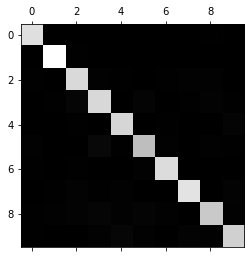

In [12]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

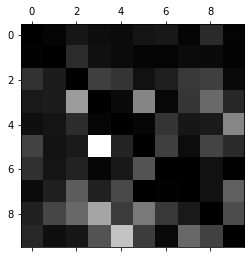

In [13]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums
np.fill_diagonal(norm_conf_matrix, 0)

plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()